<a href="https://colab.research.google.com/github/DianAzizah13/Capstone/blob/main/ML/Kitchen's_Pal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

K.clear_session()

In [ ]:
dataset='/content/drive/Shareddrives/Bangkit Capstone/Vegetable Images'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"validation")
validation_folder = os.path.join(dataset,"test")

In [ ]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

count_files(os.path.join(test_folder))

There are 200 files in Wortel
There are 200 files in Terung_Hijau
There are 200 files in Tomat
There are 200 files in Semangka
There are 200 files in Strawberry
There are 200 files in Pir
There are 200 files in Pisang
There are 200 files in Selada
There are 200 files in Terung
There are 200 files in Ubi
There are 200 files in Lemon
There are 200 files in Paprika
There are 200 files in Pare
There are 200 files in Mentimun
There are 200 files in Leci
There are 200 files in Labu_Air
There are 200 files in Mangga
There are 200 files in Lobak
There are 200 files in Pepaya
There are 200 files in Nanas
There are 200 files in Labu
There are 200 files in Kembang_Kol
There are 200 files in Jeruk
There are 200 files in Jamur
There are 200 files in Kiwi
There are 200 files in Kentang
There are 200 files in Kol
There are 200 files in Kacang_Polong
There are 200 files in Jahe
There are 200 files in Buah_Naga
There are 200 files in Bawang_Merah
There are 200 files in Cabai
There are 200 files in Angg

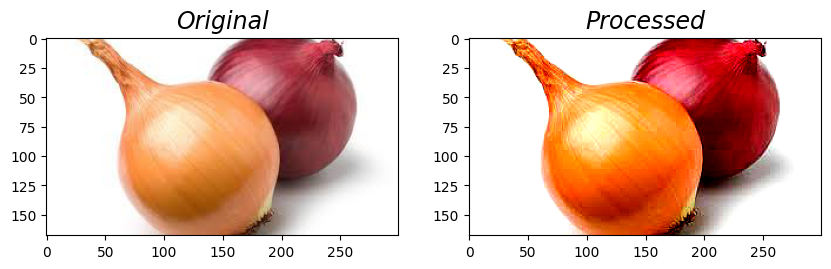

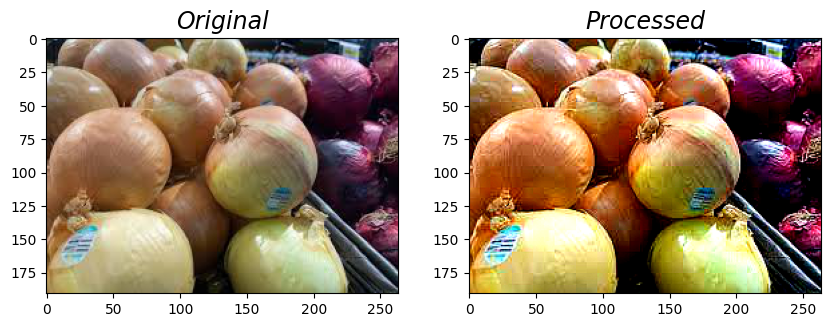

In [ ]:
image_folder="Bawang_Merah"  # The vegetable you want to display
number_of_images=2       # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):

        folder = os.path.join(test_folder,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Original', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)

        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1

Preprocess()

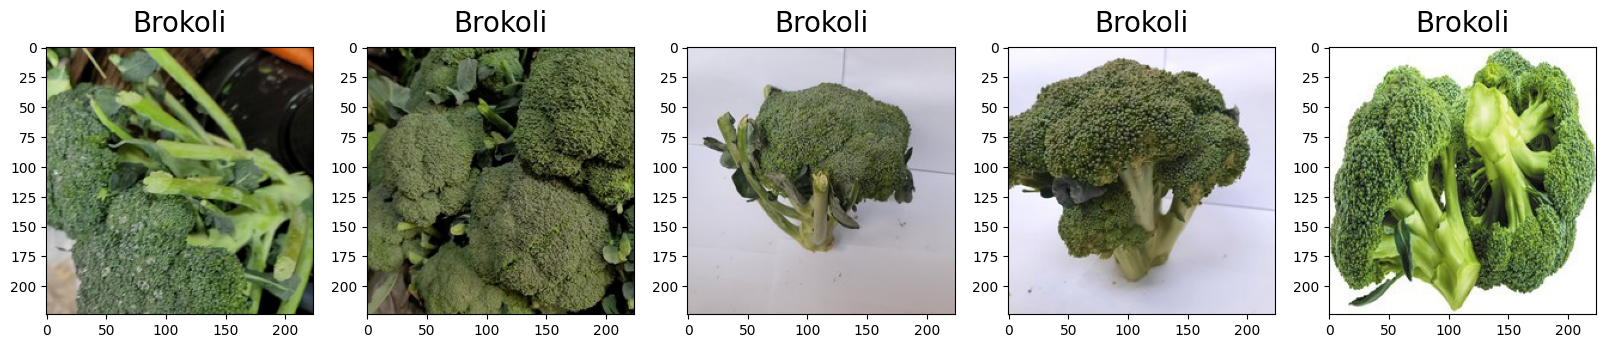

In [ ]:
select_vegetable="Brokoli"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):

    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)

    if i==total_images-1:
        break

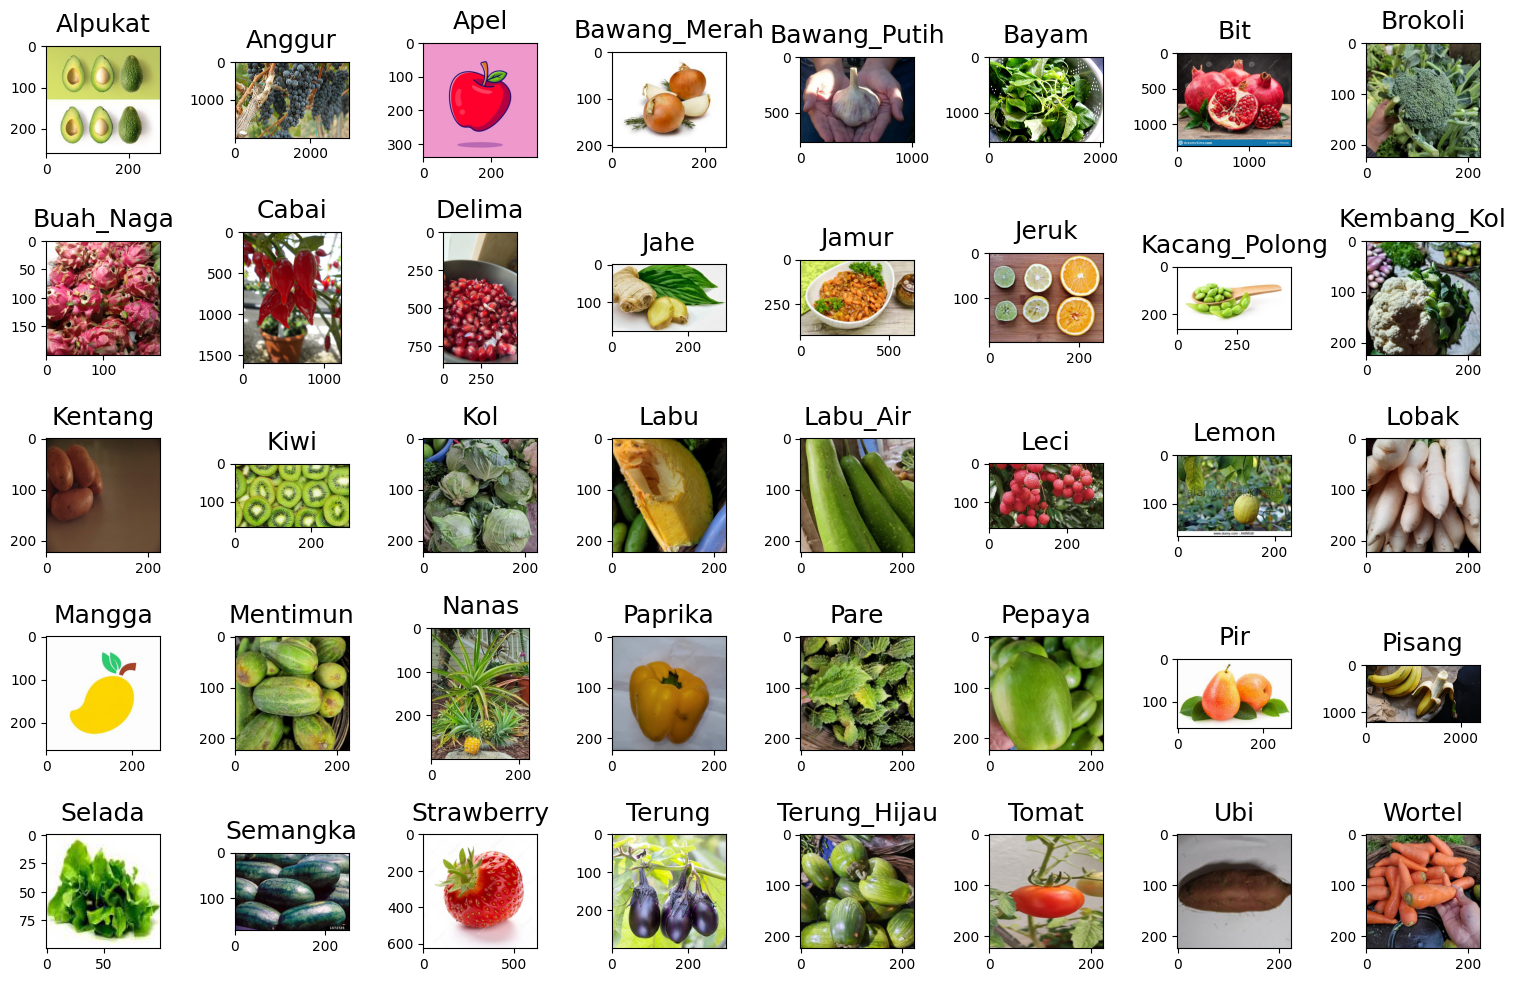

In [ ]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 8, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [ ]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(40, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')


Found 40000 images belonging to 40 classes.
Found 8000 images belonging to 40 classes.


In [ ]:
class_map = training_set.class_indices
class_map

{'Alpukat': 0,
 'Anggur': 1,
 'Apel': 2,
 'Bawang_Merah': 3,
 'Bawang_Putih': 4,
 'Bayam': 5,
 'Bit': 6,
 'Brokoli': 7,
 'Buah_Naga': 8,
 'Cabai': 9,
 'Delima': 10,
 'Jahe': 11,
 'Jamur': 12,
 'Jeruk': 13,
 'Kacang_Polong': 14,
 'Kembang_Kol': 15,
 'Kentang': 16,
 'Kiwi': 17,
 'Kol': 18,
 'Labu': 19,
 'Labu_Air': 20,
 'Leci': 21,
 'Lemon': 22,
 'Lobak': 23,
 'Mangga': 24,
 'Mentimun': 25,
 'Nanas': 26,
 'Paprika': 27,
 'Pare': 28,
 'Pepaya': 29,
 'Pir': 30,
 'Pisang': 31,
 'Selada': 32,
 'Semangka': 33,
 'Strawberry': 34,
 'Terung': 35,
 'Terung_Hijau': 36,
 'Tomat': 37,
 'Ubi': 38,
 'Wortel': 39}

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
625/625 [==============================] - 15603s 25s/step - loss: 0.8441 - accuracy: 0.7589 - val_loss: 0.5319 - val_accuracy: 0.8509
Epoch 2/5
625/625 [==============================] - 4271s 7s/step - loss: 0.4650 - accuracy: 0.8589 - val_loss: 0.4722 - val_accuracy: 0.8677
Epoch 3/5
625/625 [==============================] - 4357s 7s/step - loss: 0.3983 - accuracy: 0.8792 - val_loss: 0.4704 - val_accuracy: 0.8687
Epoch 4/5
625/625 [==============================] - 4309s 7s/step - loss: 0.3612 - accuracy: 0.8869 - val_loss: 0.4359 - val_accuracy: 0.8780
Epoch 5/5
625/625 [==============================] - 4281s 7s/step - loss: 0.3239 - accuracy: 0.8961 - val_loss: 0.4261 - val_accuracy: 0.8806


In [ ]:
model.save('model_inceptionV3_epoch5.h5')

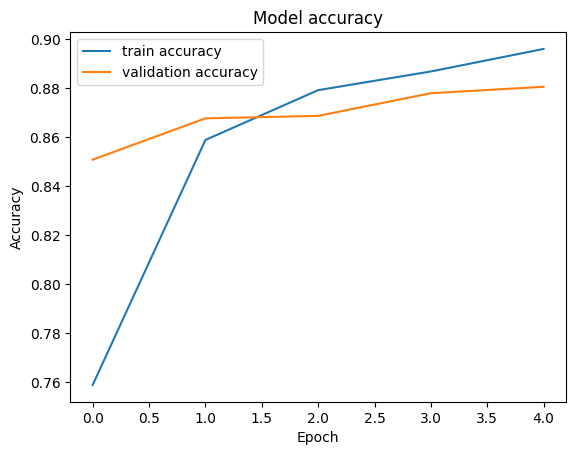

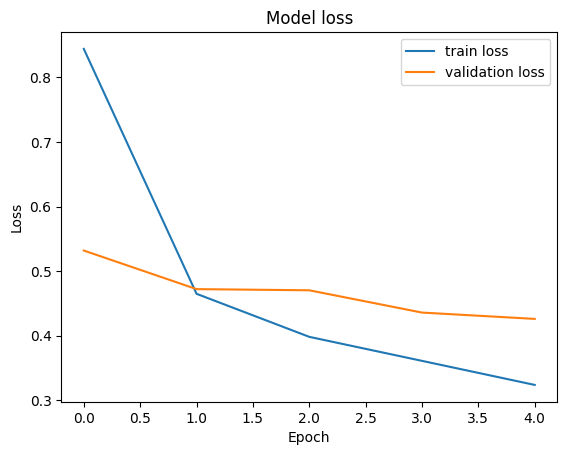

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(r)
plot_loss(r)

In [ ]:
print("Total layers in the model : ",len(model.layers),"\n")

layers = [layer.output for layer in model.layers[0:]]
layer_names = []
for layer in model.layers[0:]:
    layer_names.append(layer.name)

print("First layer : ", layer_names[0])
print("InceptionV3 layers : Layer 2 to Layer 311")
print("Our fine tuned layers : ", layer_names[311:314])
print("Final Layer : ", layer_names[314])

Total layers in the model :  315 

First layer :  input_1
InceptionV3 layers : Layer 2 to Layer 311
Our fine tuned layers :  ['global_average_pooling2d', 'dense', 'dropout']
Final Layer :  dense_1


In [ ]:
K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
validation_data_dir = '/content/drive/Shareddrives/Bangkit Capstone/Vegetable Images/test'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 7994 images belonging to 40 classes.
Test Accuracy: 0.895


In [ ]:
category={
    0:'Alpukat', 1: 'Anggur', 2: 'Apel', 3: 'Bawang_Merah', 4: 'Bawang_Putih', 5: 'Bayam', 6: 'Bit', 7: 'Brokoli',
    8: 'Buah_Naga', 9: 'Cabai', 10: 'Delima', 11: 'Jahe', 12: 'Jamur', 13: 'Jeruk', 14: 'Kacang_Polong', 15: 'Kembang_Kol',
    16: 'Kentang', 17: 'Kiwi', 18: 'Kol', 19: 'Labu', 20: 'Labu_Air', 21: 'Leci', 22: 'Lemon', 23: 'Lobak',
    24: 'Mangga', 25: 'Mentimun', 26: 'Nanas', 27: 'Paprika', 28: 'Pare', 29: 'Pepaya', 30: 'Pir', 31: 'Pisang',
    32: 'Selada', 33: 'Semangka', 34: 'Strawberry', 35: 'Terung', 36: 'Terung_Hijau', 37: 'Tomat', 38: 'Ubi', 39: 'Wortel'
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0)
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 1s 1s/step


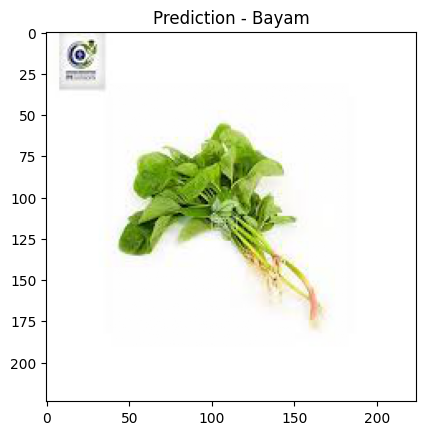

In [ ]:
predict_image(os.path.join(validation_folder,'Bayam/6 (24).jpg'),model)

In [ ]:
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 98ms/step
Accuracy for Kembang_Kol: 0.99 (198/200)
1/1 [==============================] - 0s 145ms/step
Accuracy for Kentang: 0.97 (194/200)
1/1 [==============================] - 0s 97ms/step
Accuracy for Kiwi: 0.91 (181/200)
1/1 [==============================] - 0s 95ms/step
Accuracy for Kol: 0.99 (198/200)
1/1 [==============================] - 0s 124ms/step
Accuracy for Labu: 0.97 (195/200)
1/1 [==============================] - 0s 98ms/step
Accuracy for Labu_Air: 0.99 (199/200)
1/1 [==============================] - 0s 98ms/step
Accuracy for Leci: 0.84 (168/200)
1/1 [==============================] - 0s 138ms/step
Accuracy for Lemon: 0.48 (96/200)
1/1 [==============================] - 0s 100ms/step
Accuracy for Lobak: 0.99 (199/200)
1/1 [==============================] - 0s 106ms/step
Accuracy for Mangga: 0.77 (154/200)
1/1 [==============================] - 0s 105ms/step
Accuracy for Me

In [ ]:
def labels_confusion_matrix(validation_folder):

    folder_path=validation_folder

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matrix(validation_folder)
print_confusion_matrix(y_true,y_pred)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 99ms/step


ValueError: ignored

In [ ]:
# Mengunggah gambar
uploaded = files.upload()

# Melakukan prediksi untuk setiap gambar yang diunggah
for filename in uploaded.keys():
    image_path = filename
    predict_image(image_path, model)

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = load_model('model_inceptionV3_epoch5.h5')  # Ganti dengan nama file model yang sesuai

# Daftar kategori
category = {
    0:'Alpukat', 1: 'Anggur', 2: 'Apel', 3: 'Bawang_Merah', 4: 'Bawang_Putih', 5: 'Bayam', 6: 'Bit', 7: 'Brokoli',
    8: 'Buah_Naga', 9: 'Cabai', 10: 'Delima', 11: 'Jahe', 12: 'Jamur', 13: 'Jeruk', 14: 'Kacang_Polong', 15: 'Kembang_Kol',
    16: 'Kentang', 17: 'Kiwi', 18: 'Kol', 19: 'Labu', 20: 'Labu_Air', 21: 'Leci', 22: 'Lemon', 23: 'Lobak',
    24: 'Mangga', 25: 'Mentimun', 26: 'Nanas', 27: 'Paprika', 28: 'Pare', 29: 'Pepaya', 30: 'Pir', 31: 'Pisang',
    32: 'Selada', 33: 'Semangka', 34: 'Strawberry', 35: 'Terung', 36: 'Terung_Hijau', 37: 'Tomat', 38: 'Ubi', 39: 'Wortel'
}

# Fungsi untuk memproses gambar dan melakukan prediksi
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model.predict(img)
    index = np.argmax(prediction)
    predicted_label = category.get(index)  # Mendapatkan nama label prediksi

    return predicted_label

# Fungsi untuk memberikan rekomendasi penyimpanan berdasarkan jenis objek
def recommend_storage(object_type):
    recommendations = []

    if object_type == 'Alpukat':
        recommendations.append('Simpan di suhu ruang sampai alpukat matang.')
        recommendations.append('Setelah matang, simpan alpukat di kulkas pada suhu 4-8°C.')
    elif object_type == 'Anggur':
        recommendations.append('Masukkan kedalam plastik dan simpan di dalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Apel':
        recommendations.append('Simpan di dalam kulkas pada suhu 4-8°C.')
        recommendations.append('Hindari menumpuk dengan buah lain yang mudah busuk.')
    elif object_type == 'Bawang_Merah':
        recommendations.append('Simpan di suhu ruang yang kering dan tidak lembab.')
        recommendations.append('Pisahkan dengan tempat penyimpanan kentang.')
    elif object_type == 'Bawang_Putih':
        recommendations.append('Simpan di suhu ruang yang kering dan tidak lembab.')
        recommendations.append('Pisahkan dengan tempat penyimpanan kentang.')
    elif object_type == 'Bayam':
        recommendations.append('Cuci terlebih dahulu dan dibungkus plastik.')
        recommendations.append('Simpan di kulkas pada suhu 1-4°C.')
    elif object_type == 'Bit':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
    elif object_type == 'Brokoli':
        recommendations.append('Simpan di kulkas pada suhu 1-4°C.')
    elif object_type == 'Buah_Naga':
        recommendations.append('Simpan di suhu ruang untuk memastikan kematangannya.')
        recommendations.append('Simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Cabai':
        recommendations.append('Buang batang cabai dan masukkan kedalam wadah yang dilapisi tisu.')
        recommendations.append('Simpan kedalam kulkas pada suhu 1-4°C.')
    elif object_type == 'Delima':
        recommendations.append('Simpan di suhu ruang yang sejuk dan terhindar dari sinar matahari langsung.')
    elif object_type == 'Jahe':
        recommendations.append('Simpan di wadah kedap udara dan dilapisi tisu.')
        recommendations.append('Simpan di suhu ruang.')
    elif object_type == 'Jamur':
        recommendations.append('Simpan di wadah kedap udara.')
        recommendations.append('Simpan kedalam kulkas pada suhu 1-4°C.')
    elif object_type == 'Jeruk':
        recommendations.append('Simpan di suhu ruangan pada tempat yang kering.')
        recommendations.append('Hindari kontak dengan bahan kimia atau minyak yang dapat merusak kulit.')
    elif object_type == 'Kacang_Polong':
        recommendations.append('Simpan kacang polong kering di suhu ruang.')
        recommendations.append('Simpan kacang polong segar di dalam kulkas.')
    elif object_type == 'Kembang_Kol':
        recommendations.append('SBungkus seluruh kepala kembang kol dalam kantong berlubang dan masukkan ke dalam kulkas.')
    elif object_type == 'Kentang':
        recommendations.append('Simpan di suhu ruangan pada tempat yang kering.')
        recommendations.append('Pisahkan dengan bawang.')
    elif object_type == 'Kiwi':
        recommendations.append('Simpan di suhu ruangan pada tempat yang kering.')
        recommendations.append('Pisahkan dengan buah lain yang mudah busuk.')
    elif object_type == 'Kol':
        recommendations.append('Cuci, lalu bungkus dengan tisu atau plastik.')
        recommendations.append('Simpan kedalam kulkas pada suhu 1-4°C.')
    elif object_type == 'Labu':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
        recommendations.append('Potong labu, simpan di wadah tertutup, dan disimpan di kulas.')
    elif object_type == 'Labu_Air':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
        recommendations.append('Potong labu, simpan di wadah tertutup, dan disimpan di kulas.')
    elif object_type == 'Leci':
        recommendations.append('Simpan di suhu ruangan pada tempat yang kering.')
    elif object_type == 'Lemon':
        recommendations.append('Simpan di suhu ruangan.')
        recommendations.append('Masukkan ke wadah kedap udara atau kantong plastik, lalu disimpan di kulkas.')
    elif object_type == 'Lobak':
        recommendations.append('Bersihkan Lobak dibawah air mengalir dengan menggosok lembut bagian Lobak yang kotor, keringkan, dan buang bagian daunnya.')
        recommendations.append('Masukkan dalam wadah dan simpan dikulkas.')
    elif object_type == 'Mangga':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk dan kering.')
        recommendations.append('Simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Mentimun':
        recommendations.append('Simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Nanas':
        recommendations.append('Simpan di suhu ruangan.')
        recommendations.append('Potong nanas, masukkan ke wadah tertutup, dan simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Paprika':
        recommendations.append('Lap dan masukkan ke dalam plastik kering dan longgar.')
        recommendations.append('Simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Pare':
        recommendations.append('Masukkan ke dalam wadah tertutup.')
        recommendations.append('Simpan kedalam kulkas pada suhu 4-8°C.')
    elif object_type == 'Pepaya':
        recommendations.append('Simpan di suhu ruang untuk memastikan kematangannya.')
        recommendations.append('Potong pepaya, simpan di wadah tertutup, dan disimpan di kulas.')
    elif object_type == 'Pir':
        recommendations.append('Simpan  ke dalam kulkas dengan suhu yang sejuk dan tidak lembab.')
    elif object_type == 'Pisang':
        recommendations.append('Simpan di suhu ruangan, jauh dari paparan sinar matahari langsung.')
        recommendations.append('Hindari meletakkan di dekat buah lain yang dapat mempercepat pematangan.')
    elif object_type == 'Selada':
        recommendations.append('Masukkan ke dalam wadah yang telah dilapisi tisu.')
        recommendations.append('Simpan di kulkas denagn suhu 4-8°C.')
    elif object_type == 'Semangka':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
        recommendations.append('Potong semangka, simpan di wadah tertutup, dan disimpan di kulas.')
    elif object_type == 'Strawberry':
        recommendations.append('Cuci dan keringkan, lalu masukkan kedalam wadah tertutup.')
        recommendations.append('Simpan di kulkas denagn suhu 4-8°C.')
    elif object_type == 'Terung':
        recommendations.append('Simpan terong di kulkas denagn suhu 1-4°C.')
    elif object_type == 'Terung_Hijau':
        recommendations.append('Simpan terong di kulkas denagn suhu 1-4°C.')
    elif object_type == 'Tomat':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
    elif object_type == 'Ubi':
        recommendations.append('Simpan di suhu ruangan pada tempat yang sejuk, gelap, dan kering.')
    elif object_type == 'Wortel':
        recommendations.append('Rendam wortel di dalam air agar lebih tahan lama.')
        recommendations.append('Simpan di tempat sejuk, gelap, dan kering.')
    else:
        recommendations.append('Rekomendasi penyimpanan tidak tersedia untuk objek ini.')

    return recommendations

# Fungsi untuk memprediksi gambar dan menampilkan hasil prediksi serta rekomendasi
def predict_image_with_recommendation(image_path, model):
    predicted_label = predict_image(image_path, model)
    recommendations = recommend_storage(predicted_label)

    print('Prediction:', predicted_label)
    print('Recommendations:')
    for recommendation in recommendations:
        print('- ' + recommendation)

    # Memuat dan menampilkan gambar
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Mengunggah gambar
uploaded = files.upload()

# Melakukan prediksi dan menampilkan rekomendasi untuk setiap gambar yang diunggah
for filename in uploaded.keys():
    image_path = filename

    # Melakukan prediksi gambar
    predicted_label = predict_image(image_path, model)

    # Menampilkan hasil prediksi
    print('Predicted Label:', predicted_label)

    # Memberikan rekomendasi penyimpanan
    recommendations = recommend_storage(predicted_label)

    # Menampilkan rekomendasi penyimpanan
    print('Recommendations:')
    for recommendation in recommendations:
        print('- ' + recommendation)

    # Menampilkan gambar
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
